#Covid-19 Modeling

Given real data on Covid-19 of different populations, can we measure the rate of spread as well as extrapolate for the future?

The **Susceptible, Infected, and Recovered (SIR)** populations make up a system of differential equations

In [ ]:
from google.colab import drive
#Just login, follow the link and copy the code
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from numpy import load

part1a = load('/content/drive/My Drive/PSTAT_197A/part1a.npz')
#You need to make a folder in your google drive called PSTAT_197A with part1a.npz and part1b.npz in it
# displays what elements are contained in part1a
print("Elements: ", part1a.files)

# displays what each element from part1a contains
for i in part1a.files:
    print(i)
    print(part1a[i])

# Save the elements into their own variables:
Svc_0_pmf = part1a['Svc_0_pmf']
Lc = part1a['Lc']
Ic_0 = part1a['Ic_0']
gamma = part1a['gamma']
N = part1a['N']

Elements:  ['N', 'Svc_0_pmf', 'Lc', 'Ic_0', 'gamma']
N
100000.0
Svc_0_pmf
[[0.10953309 0.03300776 0.08179044 0.11593994]
 [0.03089752 0.08511994 0.04528764 0.05718283]
 [0.07471465 0.02495643 0.10236599 0.04256696]
 [0.01605863 0.08109608 0.09158212 0.00789999]]
Lc
[0.3 0.4 0.7 1. ]
Ic_0
[47 90 51 65]
gamma
0.07142857142857142


# Simulated Model, Not Real-World Data

First, we will set up our initial values. For $\beta_v$ and $\beta_c$, we have given four arbitrary values for elements 0-3 in each $\beta$.

Next, we will run our 120-day simulation given the parameters above:

In [ ]:
# Arbitrary beta_vc values [0,1]
beta_vc = np.array([np.array([0.05, 0.1, 0.15, 0.2]),
                   np.array( [0.1, 0.2, 0.3, 0.4]),
                   np.array( [0.2, 0.5, 0.7, 0.9]),
                   np.array( [0.8, 0.85, 0.9, 0.95])])

# Can readjust to simulate a different amount of days:
days = 120 

# Rate of susceptible people over the next 120 days (and day 0) will be stored in this Svc array:
Svc = np.array([(Svc_0_pmf*N).astype(int)] * (days+1))

# Initial pmf for susceptible people:
Svc_pmf = np.array([Svc_0_pmf] * (days+1))

# Shape dimensions of Ic:
Ic_cols = Ic_0.shape[0] # number of columns for each element of Ic (should come out to 4 in this case)

# Rate of infected people over the next 120 days (and day 0) will be stored in this Ic array:
Ic = np.array([Ic_0] * (days+1))

# Rate of recovered people R:
R = np.array([0] * (days+1))

# Viral load L:
L = np.array([sum(Ic[0] * Lc / N)] * (days+1))

# Commence the 120-day loop:
for t in range(1, days+1):
    # Susceptible simulation
    Svc_pmf[t] = beta_vc * Svc[t-1] * sum(Ic[t-1]) / N
    Svc[t] = Svc[t-1] - ( Svc_pmf[t] )
    
    # Infected simulation
    Ic[t] = Ic[t-1] + ( (np.sum(Svc_pmf[t], axis=0) ) - gamma * Ic[t-1] )

    # Recovered simulation
    R[t] = R[t-1] + ( gamma * sum(Ic[t-1]) )

    # Viral load simulation
    L[t] = sum(Ic[t-1] * Lc)

In [ ]:
# In case you want to see the results, uncomment any of the following lines:
#print(sum(Svc[0]))
#print(Svc)
#print(Ic)
#print(R)
#print(L)

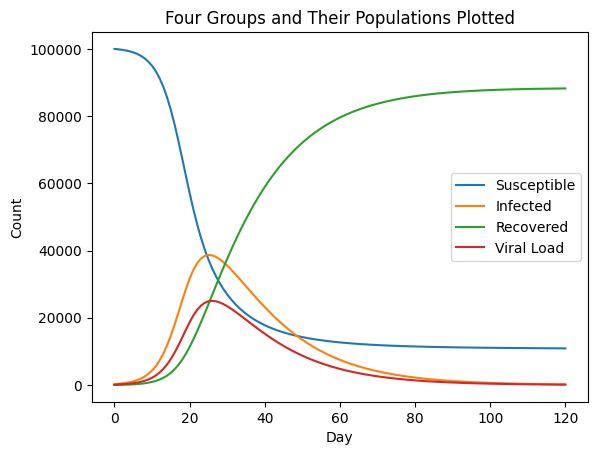

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(23,5))
# plt.subplot(1,4,1)

plt.plot( np.sum(np.sum(Svc, axis=1), axis=1), label="Susceptible" )
plt.plot( np.sum(Ic, axis=1), label="Infected" )
plt.plot(R, label="Recovered")
plt.plot(L, label="Viral Load")
plt.xlabel("Day")
plt.title('Four Groups and Their Populations Plotted')
plt.ylabel("Count")
plt.legend(loc=5)

plt.show()

In [ ]:
print("S =",np.sum(np.sum(Svc, axis=1), axis=1))
print("I =",np.sum(Ic, axis=1))
print("R =",R)
np.set_printoptions(suppress=True)
print("L =",L)
np.set_printoptions(suppress=False)

S = [99990 99879 99732 99541 99291 98963 98530 97959 97213 96239 94977 93355
 91298 88730 85592 81853 77534 72725 67583 62318 57155 52288 47844 43879
 40394 37348 34689 32366 30322 28522 26927 25512 24250 23120 22104 21190
 20366 19622 18947 18334 17777 17271 16807 16384 15997 15641 15313 15013
 14735 14480 14244 14027 13825 13638 13464 13303 13152 13012 12883 12763
 12651 12546 12448 12357 12272 12192 12119 12049 11984 11922 11864 11808
 11758 11709 11664 11621 11583 11545 11509 11475 11443 11412 11385 11359
 11333 11307 11283 11261 11240 11220 11200 11180 11161 11145 11130 11115
 11101 11087 11074 11061 11049 11037 11026 11017 11008 10999 10990 10981
 10972 10963 10955 10947 10939 10931 10923 10915 10907 10899 10891 10883
 10875]
I = [  253   336   447   595   792  1055  1404  1864  2468  3256  4277  5583
  7232  9272 11738 14629 17894 21416 25020 28488 31606 34207 36198 37566
 38359 38655 38542 38105 37414 36532 35507 34377 33176 31928 30655 29369
 28085 26814 25563 24340 23150 2199

## Shapes of the SIR Plots

The plots follow a distinct pattern with relation to each other. The susceptible population decreases as more people get infected and move to the infected population. The viral load is also directly proportional to the infected population. Finally, as people recover from the disease, the population of recovered increases. The recovered plot resembles what people think of when they say "Flatten the Curve". It is interesting to see how the susceptible and recovered plots somewhat mirror each other in shape. The infected and viral graphs are both parabolic and reach their maximum at about the inflection point of the susceptible curve.

## Population % That Never Got Infected

In [ ]:
print('Percentages of the Population that Never Got Infected:')
print(((Svc[120]/Svc[0]))*100)

Percentages of the Population that Never Got Infected:
[[53.20916644 27.15151515 14.61058809  7.59941344]
 [27.09614762  7.47268241  1.10424028  0.        ]
 [ 7.38856913  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


## Decreasing the Rate of Spread by a Factor of 1/4

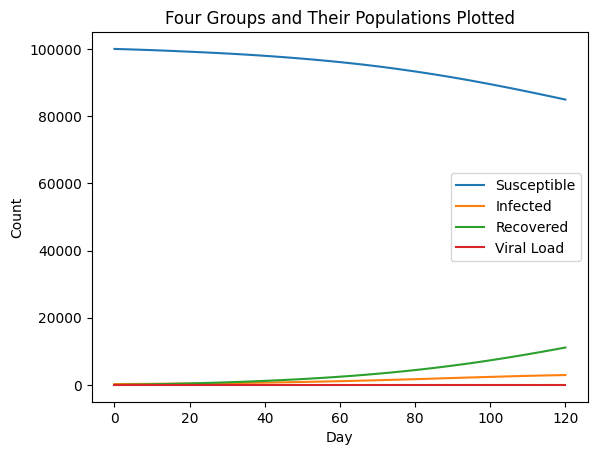

In [ ]:
# Multiply beta values by 1/4
beta_vc_14 = (0.25 * beta_vc)

# Rate of susceptible people over the next 120 days (and day 0) will be stored in this Svc array:
Svc = np.array([(Svc_0_pmf*N).astype(int)] * (days+1))

# Initial pmf for susceptible people:
Svc_pmf = np.array([Svc_0_pmf] * (days+1))

# Shape dimensions of Ic:
Ic_cols = Ic_0.shape[0] # number of columns for each element of Ic (should come out to 4 in this case)

# Rate of infected people over the next 120 days (and day 0) will be stored in this Ic array:
Ic = np.array([Ic_0] * (days+1))

# Rate of recovered people R:
R = np.array([0] * (days+1))

# Viral load L:
L = np.array([sum(Ic[0] * Lc / N)] * (days+1))

# Repeat the 120 day loop, but with updated beta values
for t in range(1, days+1):
    # Susceptible simulation
    Svc_pmf[t] = beta_vc_14 * Svc[t-1] * sum(Ic[t-1]) / N
    Svc[t] = Svc[t-1] - ( Svc_pmf[t] )
    
    # Infected simulation
    Ic[t] = Ic[t-1] + ( (np.sum(Svc_pmf[t], axis=0) ) - gamma * Ic[t-1] )

    # Recovered simulation
    R[t] = R[t-1] + ( gamma * sum(Ic[t-1]) )


# plt.figure(figsize=(23,5))
# plt.subplot(1,4,1)

plt.plot( np.sum(np.sum(Svc, axis=1), axis=1), label="Susceptible" )
plt.plot( np.sum(Ic, axis=1), label="Infected" )
plt.plot(R, label="Recovered")
plt.plot(L, label="Viral Load")
plt.xlabel("Day")
plt.title('Four Groups and Their Populations Plotted')
plt.ylabel("Count")
plt.legend(loc=5)

plt.show()

After multiplying the arbitrary $\beta_{v,c}$ values by 1/4 and re-simulating the 120 day loop, the $S, I , R$ values are changing at a much slower rate. The full 120-day graph resembles only the first 10 days of the previous graph. The  recovered population is resembling exponential growth. Since the $\beta_{v,c}$ values are smaller than before, Covid is taking longer to spread. 

In [ ]:
# Percentages of population that never got infected; updated beta values
print('Percentages of the Population that Never Got Infected (updated beta values):')
print(((Svc[120]/Svc[0]))*100)

Percentages of the Population that Never Got Infected (updated beta values):
[[97.54405186 94.24242424 93.58112239 91.96929181]
 [94.17287148 91.76360005 87.67667845 84.5575376 ]
 [91.68785972 80.04008016 75.50801094 69.12593985]
 [70.03115265 71.04451844 69.75322123 62.73764259]]


## Finding the Rate of Spread on Real-World Data


Using a gridsearch algorithm to solve a system of ODEs. First, using the training dataset to check the algorithm:

In [ ]:
import numpy as np
from numpy import load

part1b = load('/content/drive/My Drive/PSTAT_197A/part1b.npz')

# displays what elements are contained in part1a
print("Elements: ", part1b.files)


Elements:  ['N', 'Lc', 'Ic_0', 'gamma', 'L_validation', 'L_test', 'betas_validation']


In [ ]:
from scipy import integrate
from itertools import product


Lc = part1b['Lc']
Ic_0 = part1b['Ic_0']
N = part1b['N']
L_validation = part1b['L_validation']
gamma=part1b["gamma"]
L_test=part1b["L_test"]
betas_validation=part1b["betas_validation"]
Svc_0_pmf = np.array([[0.5,0.3,0.1,0.1],[0.4,0.3,0.2,0.1],[0.3,0.3,0.3,0.2],[0.1,0.2,0.3,0.4]])

In [ ]:
from sklearn.metrics import mean_squared_error

#defning the ODE solver
def sys_ode(t, Z, N, gamma):
    
    Svc=Z[0:4]
    Ic=Z[4:8]
    R=Z[8]
    
    dSvc_dt = -betas*Svc*Ic.sum()/N
    dIc_dt=-dSvc_dt-(gamma*Ic)
    dR_dt=np.array([gamma*Ic.sum()])
    
    return np.concatenate([dSvc_dt,dIc_dt,dR_dt])

This gridsearch will take approx 10 minutes

In [ ]:
#for the loops
nb_v=4
nb_nodes=5
t=range(20) #for the solve_ivp
beta_grid=np.linspace(0,1,21)
#for the results
betas_mmse_1= np.zeros((4,4))
for v in range(nb_v):
    #iterating
    iter_0=v*5
    iter_1=(v*5)+5
    #initial conditions
    Ic_0_v1=Ic_0[iter_0:iter_1]
    R_0_v1 = np.array([0])
    Svc_0_v1=np.swapaxes(np.array([N-np.sum(Ic_0_v1,axis=1)]*4),0,1)*Svc_0_pmf[v]
    #for finding the mmse
    mmse= np.inf
    #for comparing in the loop
    L_predicted=np.zeros((5,20))
    L_validation_v1=L_validation[iter_0:iter_1]
    for beta_0,beta_1,beta_2,beta_3 in product(beta_grid,beta_grid,beta_grid,beta_grid):
        if beta_0>beta_1 or beta_1>beta_2 or beta_2>beta_3:
            continue
        betas=np.array([beta_0,beta_1,beta_2,beta_3])
        for node_index in range(nb_nodes):
            initial_conditions=np.concatenate([Svc_0_v1[node_index],Ic_0_v1[node_index], R_0_v1])
            soln_obj = integrate.solve_ivp(sys_ode,(t[0],t[-1]),initial_conditions,\
                            args=(N,gamma),t_eval=t)
            S_predicted=soln_obj.y[0:4]
            I_predicted=soln_obj.y[4:8]
            R_predicted=soln_obj.y[8]
            L_predicted_node=np.sum(Lc*np.swapaxes(I_predicted,0,1),axis=1)
            L_predicted[node_index]=L_predicted_node
        mse = mean_squared_error(L_validation_v1, L_predicted) 
        if mse < mmse:
            mmse = mse
            betas_mmse_1[v]=betas

In [ ]:
print("True values are beta=",betas_validation)
print("Estimated values are beta=", betas_mmse_1)

True values are beta= [[0.1  0.15 0.2  0.25]
 [0.2  0.25 0.3  0.4 ]
 [0.35 0.45 0.5  0.6 ]
 [0.4  0.5  0.6  0.8 ]]
Estimated values are beta= [[0.1  0.15 0.2  0.25]
 [0.2  0.25 0.3  0.4 ]
 [0.05 0.55 0.55 0.55]
 [0.4  0.5  0.6  0.8 ]]


## Test Set

Now doing the same gridsearch with L_test

In [ ]:
#for the loops
nb_v=4
nb_nodes=5
t=range(20) #for the solve_ivp
beta_grid=np.linspace(0,1,21)
#for the results
betas_mmse_2= np.zeros((4,4))
for v in range(nb_v):
    #iterating
    iter_0=v*5
    iter_1=(v*5)+5
    #initial conditions
    Ic_0_v1=Ic_0[iter_0:iter_1]
    R_0_v1 = np.array([0])
    Svc_0_v1=np.swapaxes(np.array([N-np.sum(Ic_0_v1,axis=1)]*4),0,1)*Svc_0_pmf[v]
    #for finding the mmse
    mmse= np.inf
    #for comparing in the loop
    L_predicted=np.zeros((5,20))
    L_test_v1=L_test[iter_0:iter_1] #different than #1
    for beta_0,beta_1,beta_2,beta_3 in product(beta_grid,beta_grid,beta_grid,beta_grid):
        if beta_0>beta_1 or beta_1>beta_2 or beta_2>beta_3:
            continue
        betas=np.array([beta_0,beta_1,beta_2,beta_3])
        for node_index in range(nb_nodes):
            initial_conditions=np.concatenate([Svc_0_v1[node_index],Ic_0_v1[node_index], R_0_v1])
            soln_obj = integrate.solve_ivp(sys_ode,(t[0],t[-1]),initial_conditions,\
                            args=(N,gamma),t_eval=t)
            S_predicted=soln_obj.y[0:4]
            I_predicted=soln_obj.y[4:8]
            R_predicted=soln_obj.y[8]
            L_predicted_node=np.sum(Lc*np.swapaxes(I_predicted,0,1),axis=1)
            L_predicted[node_index]=L_predicted_node
        mse = mean_squared_error(L_test_v1, L_predicted) #different than #1
        if mse < mmse:
            mmse = mse
            betas_mmse_2[v]=betas

In [ ]:
print("Estimated values are beta=", betas_mmse_2)

Estimated values are beta= [[0.05 0.1  0.15 0.25]
 [0.2  0.25 0.3  0.4 ]
 [0.05 0.5  0.6  0.6 ]
 [0.5  0.7  0.7  0.85]]


## Given 20 days of results, predict the SIR populations for the next 100 days

In [ ]:
#Predicting the values with our test betas
#Given observed viral load for first 20 days

nb_v=4
nb_nodes=5
t=range(100) #for the solve_ivp
#for the output
L_predicted=np.zeros((20,100))
S_predicted=np.zeros((20,100))
I_predicted=np.zeros((20,100))
R_predicted=np.zeros((20,100))
for v in range(nb_v):
    #iterating
    iter_0=v*5
    iter_1=(v*5)+5
    #initial conditions
    Ic_0_v1=Ic_0[iter_0:iter_1]
    R_0_v1 = np.array([0])
    Svc_0_v1=np.swapaxes(np.array([N-np.sum(Ic_0_v1,axis=1)]*4),0,1)*Svc_0_pmf[v]
    #establishing betas
    betas=betas_mmse_2[v]
    for node_index in range(nb_nodes):
          initial_conditions=np.concatenate([Svc_0_v1[node_index],Ic_0_v1[node_index], R_0_v1])
          soln_obj = integrate.solve_ivp(sys_ode,(t[0],t[-1]),initial_conditions,\
                            args=(N,gamma),t_eval=t)
          #All new!
          node_iter=iter_0+node_index
          S_predicted_node=soln_obj.y[0:4]
          S_predicted[node_iter]=np.sum(np.swapaxes(S_predicted_node,0,1),axis=1)
          I_predicted_node=soln_obj.y[4:8]
          I_predicted[node_iter]=np.sum(np.swapaxes(I_predicted_node,0,1),axis=1)
          R_predicted[node_iter]=soln_obj.y[8] #Don't need to sum anything, R is already done
          L_predicted_node=np.sum(Lc*np.swapaxes(I_predicted_node,0,1),axis=1)
          L_predicted[node_iter]=L_predicted_node

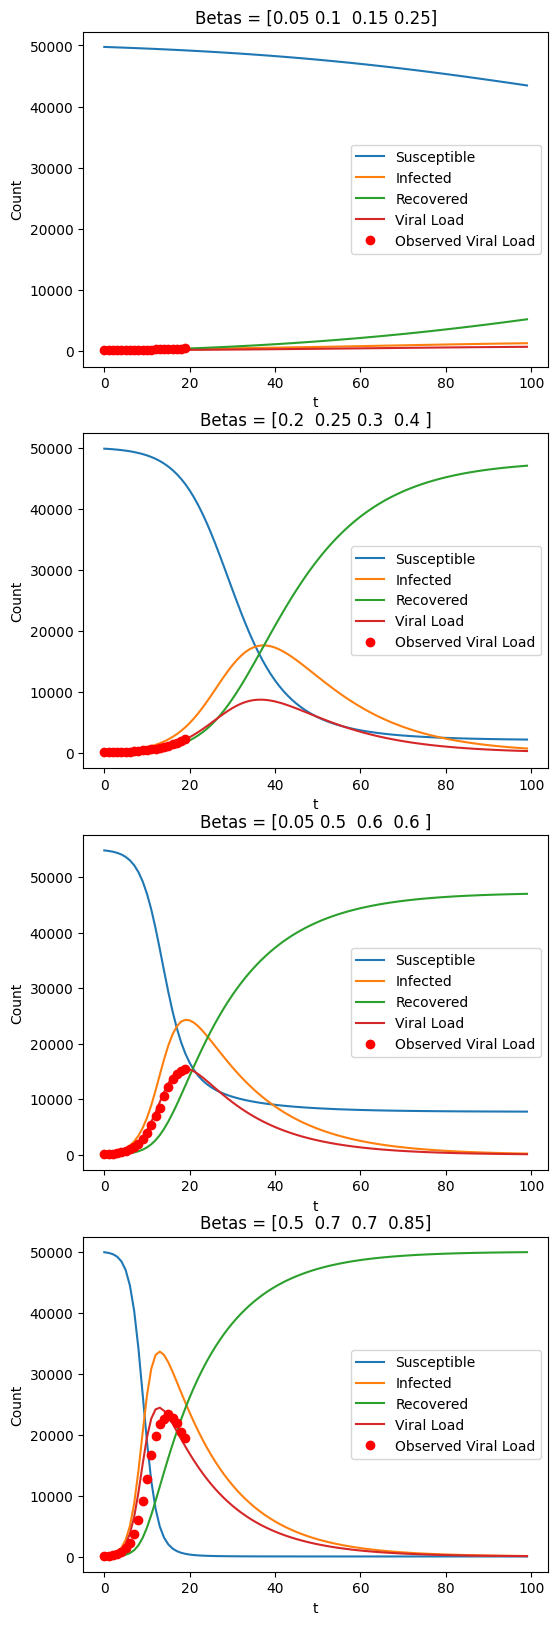

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.style.use('default')
plt.figure(figsize=(6,20))

for v in range(nb_v):
    iter_0=v*5
    plt.subplot(4,1,v+1)
    plt.plot(S_predicted[iter_0], label="Susceptible" )
    plt.plot(I_predicted[iter_0], label="Infected" )
    plt.plot(R_predicted[iter_0], label="Recovered")
    plt.plot(L_predicted[iter_0], label="Viral Load")
    plt.plot(L_validation[iter_0],'ro',label="Observed Viral Load")
    plt.xlabel("t")
    title="Betas = "+np.array_str(betas_mmse_2[v])
    plt.title(title)
    plt.ylabel("Count")
    plt.legend(loc=5)

plt.show()
    